# Stern-Gerlach Experiments
*****
## Example 1.1:
<p> A measurement of S_z is carried out on a particle in the state: \ket{phi}=1/2*\ket{+z}+i\sqrt{3}/2*\ket{-z}. What are the possible results of this measurement and with what probability do these results occur?</p>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [7]:
posZ = Qobj([[1], [0]])
negZ = Qobj([[0], [1]])
phi = 1/2*posZ + np.sqrt(3)*1j/2*negZ
phi

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.5+0.j       ]
 [0. +0.8660254j]]

In [47]:
mag1 = phi.overlap(posZ) ** 2 #probability of measuring phi in the positve z-axis direction
mag2 = phi.overlap(negZ) ** 2 #same but negative z-axis
print('The probability of measuring phi in the positive Z-direction is '+str(mag1)+', while measuring phi in the negative Z-direction is '+str(mag2)+'.')

The probability of measuring phi in the positive Z-direction is (0.25+0j), while measuring phi in the negative Z-direction is (-0.7499999999999999-0j).


## Example 1.3:
<p> For the same particle, what is the probability that a measurment of S_y is in the positive direction?

In [63]:
posY = 1/np.sqrt(2)*posZ+1j/np.sqrt(2)*negZ
negY = 1/np.sqrt(2)*posZ-1j/np.sqrt(2)*negZ
phi.overlap(posY)**2

(0.9330127018922192+0j)

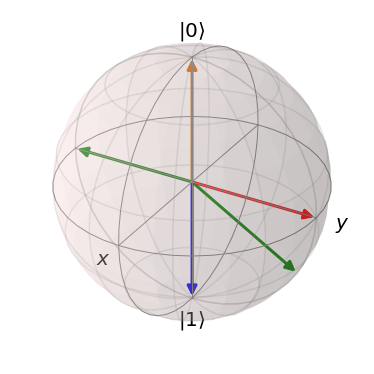

In [67]:
b = Bloch()
b.add_states([phi,posZ,negZ,posY,negY])
b.show()